# what's the key to survived on tatanic?
### I want to find out which factor have significant impact on people on tatanic to suivive or die

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic as mos
from scipy.stats import chi2_contingency
all_in_tatanic= pd.read_csv('titanic_data.csv')           ### raw data

Populating the interactive namespace from numpy and matplotlib


In [2]:
print all_in_tatanic.head()  
print all_in_tatanic['Survived'].describe()
print all_in_tatanic.info() 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
co

### there are about some missing data  in age column ,Cabin column and Embarked column
## I want to know wether these factors have significant influence on a person to survive or die
* Pclass
* Sex
* Embarked
* Age

In [3]:
y = 'Survived'
x1 = 'Pclass'
x2 = 'Sex'
x4='Embarked'

In [4]:
def get_mean(x):            #### take a look at pobability of survival and x1,x2,x4
    print all_in_tatanic.groupby(x).mean().sort_values(by='Survived',ascending=False)
    a = all_in_tatanic.groupby(x, as_index = False)['Survived'].mean()
    p = sns.barplot(data = a, x=x, y=y)
    plt.ylabel('Survival Proportions')
    p.set(xlabel = x, ylabel = 'Probability of Survival', title = 'Survivability of different '+ str(x)+' groups')


        PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550


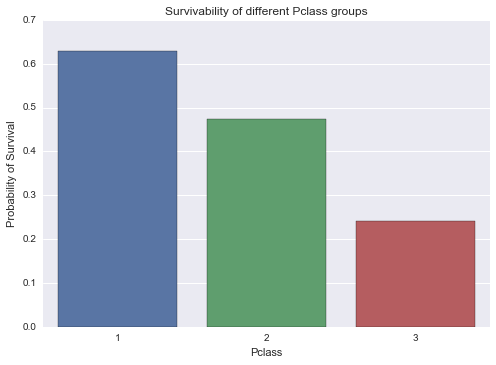

In [5]:
get_mean(x1)

        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893  


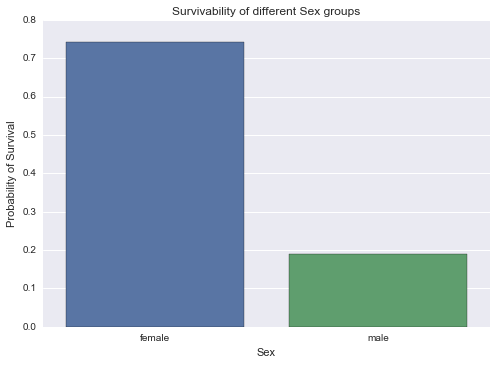

In [6]:
get_mean(x2)

          PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Embarked                                                                   
C          445.357143  0.553571  1.886905  30.814769  0.386905  0.363095   
Q          417.896104  0.389610  2.909091  28.089286  0.428571  0.168831   
S          449.527950  0.336957  2.350932  29.445397  0.571429  0.413043   

               Fare  
Embarked             
C         59.954144  
Q         13.276030  
S         27.079812  


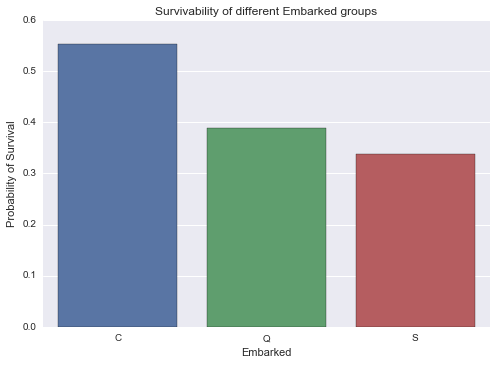

In [7]:
get_mean(x4)

 [<matplotlib.text.Text at 0xa3fa208>, <matplotlib.text.Text at 0xa403a20>],

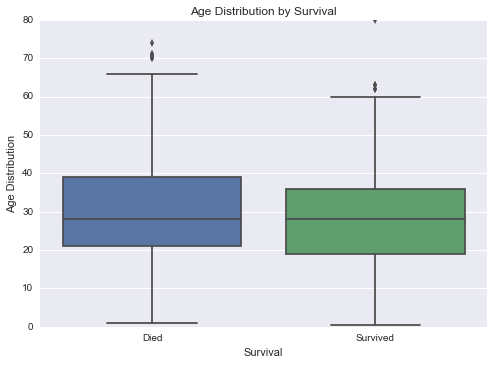

In [8]:
p = sns.boxplot(data = all_in_tatanic, x = 'Survived', y = 'Age')
p.set(title = 'Age Distribution by Survival', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived'])

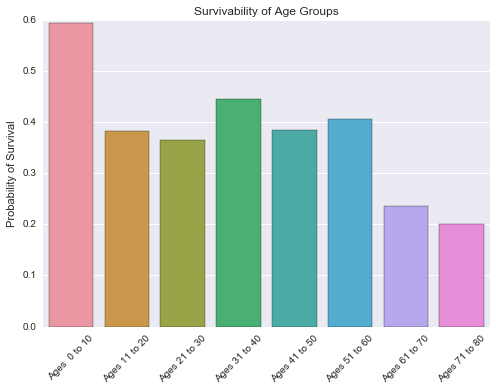

In [9]:
def age_group(i):            
    if i > 70 :
        return 'Ages 71 to 80'
    elif i > 60 :
        return 'Ages 61 to 70'
    elif i > 50:
        return 'Ages 51 to 60'
    elif i > 40:
        return 'Ages 41 to 50'
    elif i > 30:
        return 'Ages 31 to 40'
    elif i > 20:
        return 'Ages 21 to 30'
    elif i > 10:
        return 'Ages 11 to 20'
    else:
        return 'Ages  0 to 10'
all_in_tatanic['Age Group'] = all_in_tatanic['Age'].apply(age_group)
t = all_in_tatanic[all_in_tatanic.Age.notnull()].groupby('Age Group', as_index = False)['Survived'].mean()
p = sns.barplot(data = t, x = 'Age Group', y = 'Survived')
p.set(xlabel = '', ylabel = 'Probability of Survival', title = 'Survivability of Age Groups')
p.set_xticklabels([i for i in p.get_xticklabels()], rotation = 45)

## things we find out :
* 1 ,on survived rate there are these relationship: Pclass (1>2>3);Sex(female> male );Embarked(C>Q>S)
* 2 ,the relationship between Survived rate and age is not cleat

## statistic test
* Dependent variable (survived or not) is categorical, I choose Chi-Squared Test 

In [10]:
x3 = 'Age Group'
def pivot_chi2(i,j): ### as we have 4 variable I make a function to do this 
    datax=all_in_tatanic.dropna(subset=[i],inplace=False)           ## clean missing data          
    m=mos(datax,[i,j],gap=0.05,title= 'mosaic plot for '+ str(i)+' and '+str(j))  ## make a mosaic  plot 
    pv = pd.pivot_table(data = datax[[j, i]], index = j, columns = [i], aggfunc = len) # make a Contingency Table
    print pv,"/n"
    chi2, p_value, dof, expected = chi2_contingency(pv)                             ## conduct a Chi-Squared test
    print "Results of Chi-Squared test"
    print "Does "+ str(i)+" have a significant effect on "+ str(j)+" ?"
    print "Chi-Squared Score = " + str(chi2)
    print "Pvalue = " + str(p_value)
    print "\n"
  

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 /n
Results of Chi-Squared test
Does Pclass have a significant effect on Survived ?
Chi-Squared Score = 102.888988757
Pvalue = 4.5492517113e-23




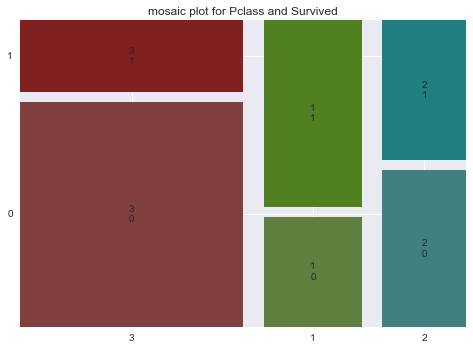

In [11]:
pivot_chi2(x1,y)

Sex       female  male
Survived              
0             81   468
1            233   109 /n
Results of Chi-Squared test
Does Sex have a significant effect on Survived ?
Chi-Squared Score = 260.717020167
Pvalue = 1.19735706278e-58




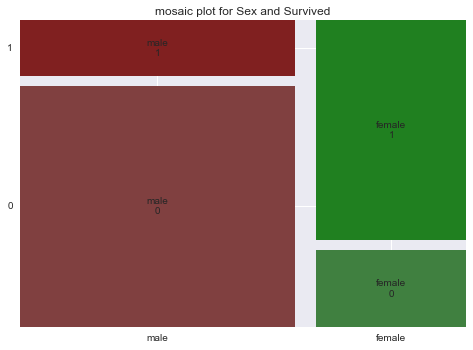

In [12]:
pivot_chi2(x2,y)


Age Group  Ages  0 to 10  Ages 11 to 20  Ages 21 to 30  Ages 31 to 40  \
Survived                                                                
0                    151             71            146             86   
1                     90             44             84             69   

Age Group  Ages 41 to 50  Ages 51 to 60  Ages 61 to 70  Ages 71 to 80  
Survived                                                               
0                     53             25             13              4  
1                     33             17              4              1   /n
Results of Chi-Squared test
Does Age Group have a significant effect on Survived ?
Chi-Squared Score = 5.29086263889
Pvalue = 0.624514496131




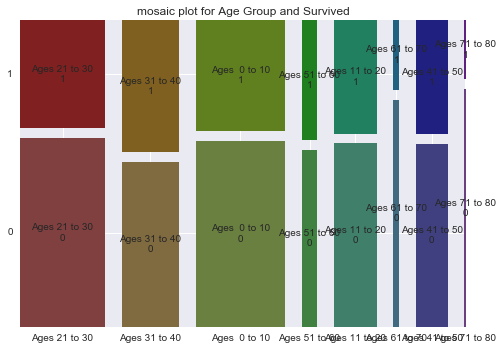

In [13]:
pivot_chi2(x3,y)

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217 /n
Results of Chi-Squared test
Does Embarked have a significant effect on Survived ?
Chi-Squared Score = 26.4891498392
Pvalue = 1.76992228412e-06




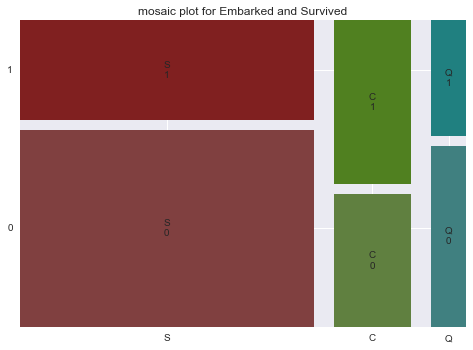

In [14]:
pivot_chi2(x4,y)

## results
* in Chi-Square on  x1 ,x2,x4 ,we can reject the Null Hypothesis and Chi-Square on x3 ,we can not reject the Null Hypothesis
* Pclass,Sex and Embarked have significantly influence on one to survive or die , and Age group have not .
